### Tests - demo of functionality

#### 0. Import basic methods (a.o. from source2.py)

In [1]:
from source2 import *

In [2]:
# load basic info from the Input sheet
mapping = load_input_from_xls(filename=r'H2 Model - Input sheet.xlsm')
Inputs = extract_scenario(mapping, 'Scenario1')

##### TEST01. show how 'reinvestment' works around the limit case (reinvestment when no  sufficient years are left)

In [3]:
foundation_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Foundation & cable')
foundation_data['depreciation_rate']=1/foundation_data['economic_lifetime']
display(foundation_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Foundation & cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 934204,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.015,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [4]:
# create Foundation object
Foundation = Object(**foundation_data)


*** calculate escalation values ****

Escalation years: [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063]
Escalation values: [1.02, 1.0404, 1.061208, 1.08243216, 1.1040808032, 1.126162419264, 1.14868566764928, 1.1716593810022657, 1.195092568622311, 1.2189944199947573, 1.2433743083946525, 1.2682417945625455, 1.2936066304537963, 1.3194787630628724, 1.3458683383241299, 1.3727857050906125, 1.4002414191924248, 1.4282462475762734, 1.4568111725277988, 1.485947395978355, 1.515666343897922, 1.5459796707758806, 1.5768992641913981, 1.6084372494752261, 1.6406059944647307, 1.6734181143540252, 1.7068864766411058, 1.741024206173928, 1.7758446902974065, 1.8113615841033548, 1.847588815785422, 1.8845405921011305, 1.9222314039431532, 1.9606760320220162, 1.9998895526624565, 2.0398873437157055, 2.08068509059002,

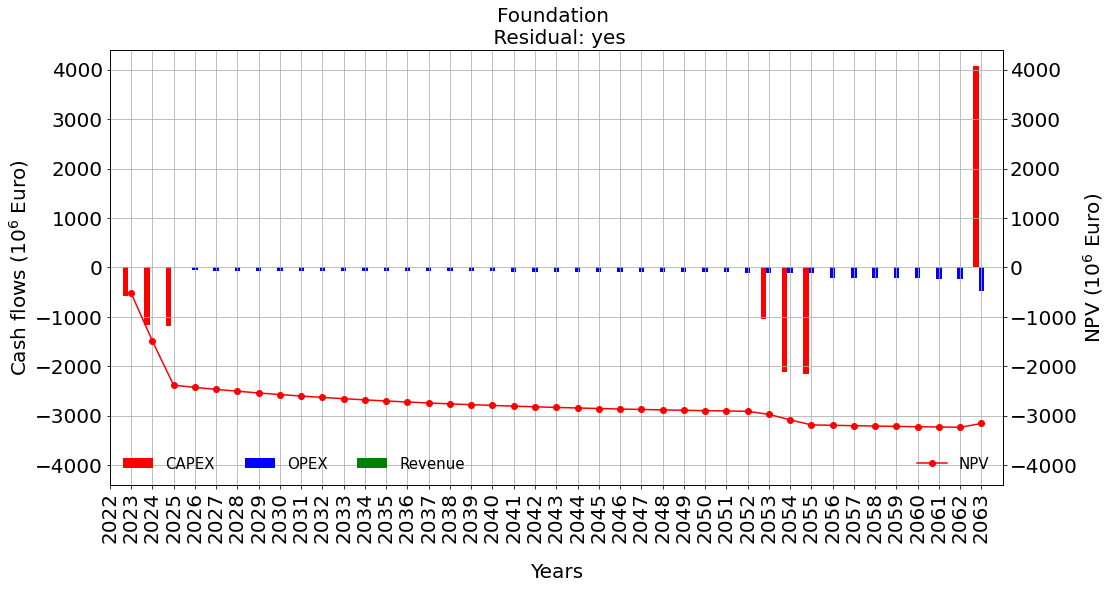

In [5]:
# case: reinvestment needed in 2053, 2056 allows for the CAPEX spending, next year decommissioning and max residual value
Foundation.generate_cashflows(startyear=2023, lifecycle=40, debug=True)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n Residual: yes' )


*** calculate escalation values ****

Escalation years: [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054]
Escalation values: [1.02, 1.0404, 1.061208, 1.08243216, 1.1040808032, 1.126162419264, 1.14868566764928, 1.1716593810022657, 1.195092568622311, 1.2189944199947573, 1.2433743083946525, 1.2682417945625455, 1.2936066304537963, 1.3194787630628724, 1.3458683383241299, 1.3727857050906125, 1.4002414191924248, 1.4282462475762734, 1.4568111725277988, 1.485947395978355, 1.515666343897922, 1.5459796707758806, 1.5768992641913981, 1.6084372494752261, 1.6406059944647307, 1.6734181143540252, 1.7068864766411058, 1.741024206173928, 1.7758446902974065, 1.8113615841033548, 1.847588815785422, 1.8845405921011305]

*** add Capex values + divestment ****

initial investment in 2023
CAPEX years: [2023, 2024, 2025]
CAPEX values: [-560522400.0, -1121044800.0, -112104

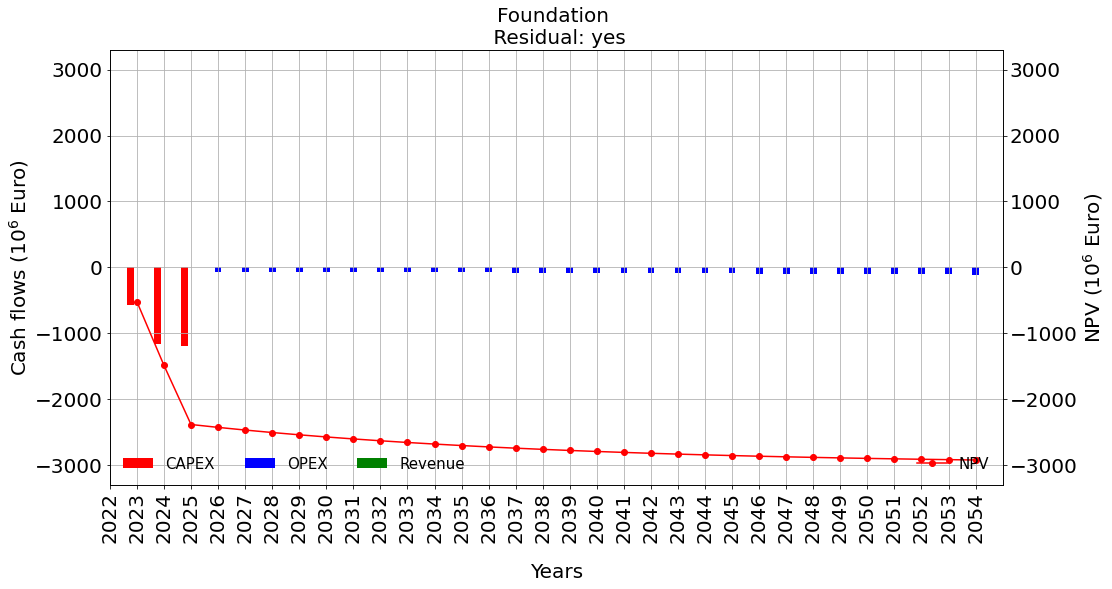

In [6]:
# case: reinvestment needed in 2053, 2054 does NOT allow the investment to pay off at least 1 year
Foundation.generate_cashflows(startyear=2023, lifecycle=31, debug=True)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n Residual: yes' )


*** calculate escalation values ****

Escalation years: [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055]
Escalation values: [1.02, 1.0404, 1.061208, 1.08243216, 1.1040808032, 1.126162419264, 1.14868566764928, 1.1716593810022657, 1.195092568622311, 1.2189944199947573, 1.2433743083946525, 1.2682417945625455, 1.2936066304537963, 1.3194787630628724, 1.3458683383241299, 1.3727857050906125, 1.4002414191924248, 1.4282462475762734, 1.4568111725277988, 1.485947395978355, 1.515666343897922, 1.5459796707758806, 1.5768992641913981, 1.6084372494752261, 1.6406059944647307, 1.6734181143540252, 1.7068864766411058, 1.741024206173928, 1.7758446902974065, 1.8113615841033548, 1.847588815785422, 1.8845405921011305, 1.9222314039431532]

*** add Capex values + divestment ****

initial investment in 2023
CAPEX years: [2023, 2024, 2025]
CAPEX values: [-560522400

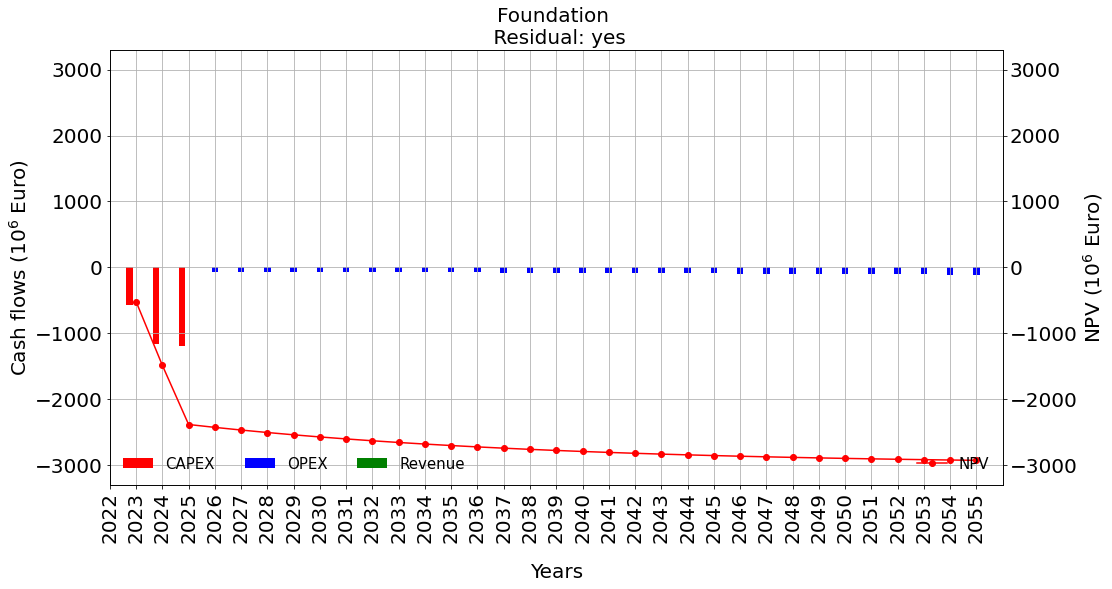

In [7]:
# case: reinvestment needed in 2053, 2055 allows for the CAPEX spending, next year decommissioning and max residual value
Foundation.generate_cashflows(startyear=2023, lifecycle=32, debug=True)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n Residual: yes' )


*** calculate escalation values ****

Escalation years: [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056]
Escalation values: [1.02, 1.0404, 1.061208, 1.08243216, 1.1040808032, 1.126162419264, 1.14868566764928, 1.1716593810022657, 1.195092568622311, 1.2189944199947573, 1.2433743083946525, 1.2682417945625455, 1.2936066304537963, 1.3194787630628724, 1.3458683383241299, 1.3727857050906125, 1.4002414191924248, 1.4282462475762734, 1.4568111725277988, 1.485947395978355, 1.515666343897922, 1.5459796707758806, 1.5768992641913981, 1.6084372494752261, 1.6406059944647307, 1.6734181143540252, 1.7068864766411058, 1.741024206173928, 1.7758446902974065, 1.8113615841033548, 1.847588815785422, 1.8845405921011305, 1.9222314039431532, 1.9606760320220162]

*** add Capex values + divestment ****

initial investment in 2023
CAPEX years: [2023, 2024, 2025]

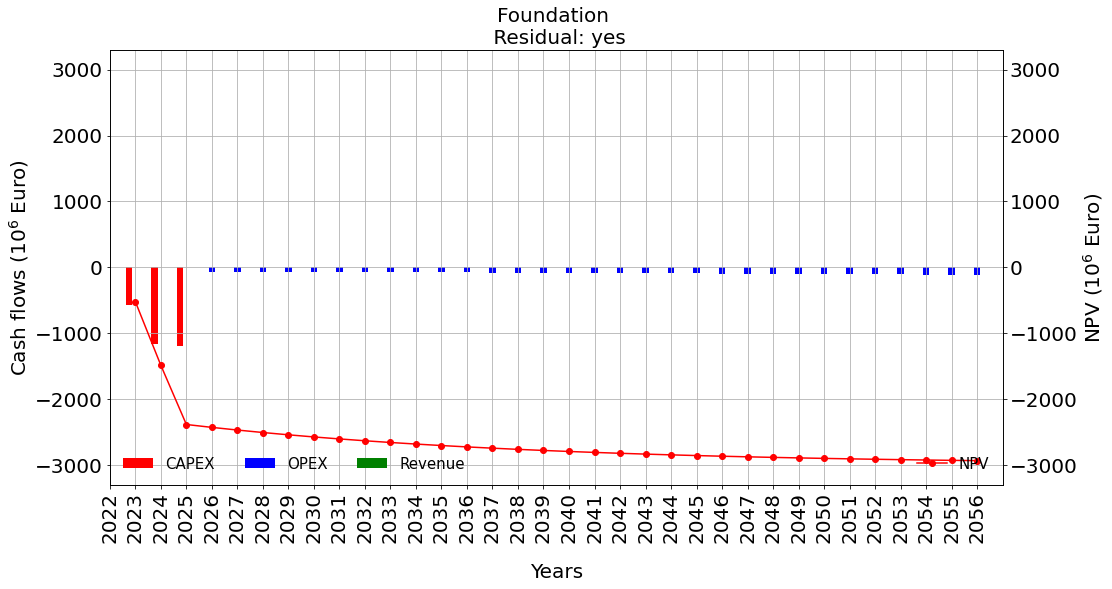

In [8]:
# case: reinvestment needed in 2053, 2056 allows for the CAPEX spending, next year decommissioning and max residual value
Foundation.generate_cashflows(startyear=2023, lifecycle=33, debug=True)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n Residual: yes' )


*** calculate escalation values ****

Escalation years: [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057]
Escalation values: [1.02, 1.0404, 1.061208, 1.08243216, 1.1040808032, 1.126162419264, 1.14868566764928, 1.1716593810022657, 1.195092568622311, 1.2189944199947573, 1.2433743083946525, 1.2682417945625455, 1.2936066304537963, 1.3194787630628724, 1.3458683383241299, 1.3727857050906125, 1.4002414191924248, 1.4282462475762734, 1.4568111725277988, 1.485947395978355, 1.515666343897922, 1.5459796707758806, 1.5768992641913981, 1.6084372494752261, 1.6406059944647307, 1.6734181143540252, 1.7068864766411058, 1.741024206173928, 1.7758446902974065, 1.8113615841033548, 1.847588815785422, 1.8845405921011305, 1.9222314039431532, 1.9606760320220162, 1.9998895526624565]

*** add Capex values + divestment ****

initial investment in 2023
CAPEX

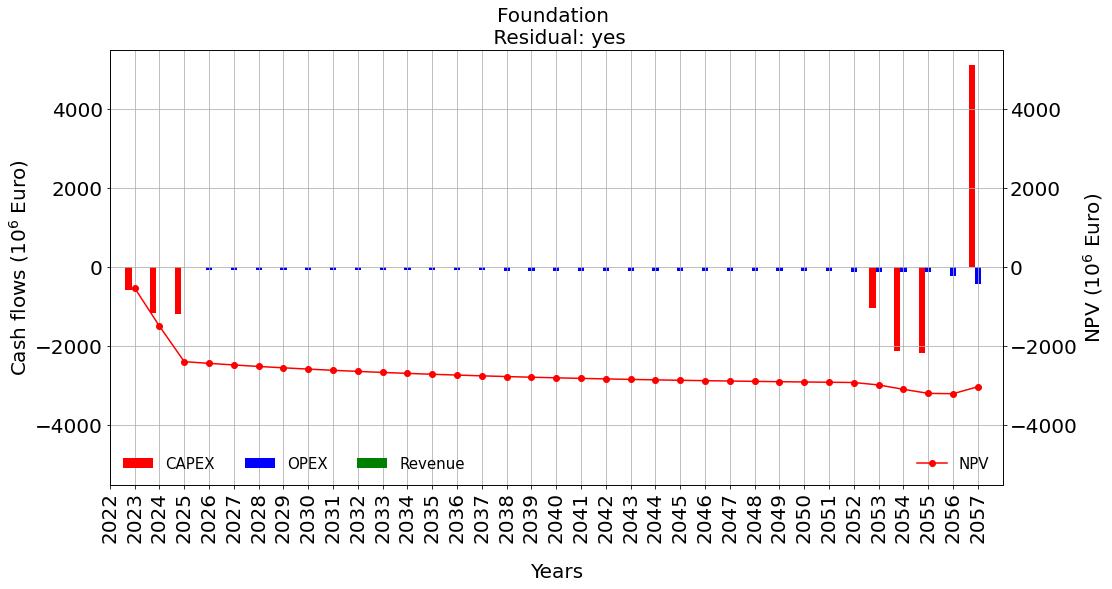

In [9]:
# case: reinvestment needed in 2053, 2057 allows for the CAPEX spending, and one operational year before decommissioning and residual value
Foundation.generate_cashflows(startyear=2023, lifecycle=34, debug=True)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n Residual: yes' )